 # Overview of Final Capstone project

## 1. Introduction to the problem

## 2. Challenge I Classification - Solution: Binary

## 3. Implementation of Binary classification with RFC, GBC, SVC and MLP

## 4. Challenge II Improve accuracy - Solution: Hyper parameter tuning by GSCV

## 5. Implementation of Neural net CNN

## 6. Challenge III Improve CNN accuracy - Solution: Hyper parameter turning by GSCV

## 7. Challenge IV Overfitting - Solution: Image Augmentation.

## 8. Challenge V Overfitting - Solution: Regularization.


## 9. Future scope 
#####                               Multilable Classfication with solving class imbalance by Undersampling/Oversampling and Class weights
#####                               and Softmax activation 
#####                               Probable model change with below:
######                        Solutions: 1) Object Detection with Bounding boxes.
######                                   2) Use of Structure Correcting Adversarial lNetwork (SCAN) framework (similar to conditional GAN)

# 1. Introduction to the problem

NIH has huge collection of 112.000 Chest X-ray images from 30,000 unique patients and need a way to accurately classify Chest X-rays using computers. They have labelled the images using NLP into 15 classes (Disease types). We need to develop a method or a model to classify these X-rays into 15 classes with minimum error rate.

Dataset is NIH Chest X-ray Dataset from Kaggle website.

Source: Full dataset 112,000 images -https://www.kaggle.com/nih-chest-xrays/data

Before going with the full dataset went ahead to test the process with a sample dataset.

Source: Sample dataset 5606 images (5% of full data)-https://www.kaggle.com/nih-chest-xrays/sample

Reading X-rays:
> In an X-ray, tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear black in the image. Dense tissues such as bones absorb the X-rays and appear white in the image. In short –

> Black = Air

> White = Bone

> Grey = Tissue or Fluid

> Now let’s look at an image from the data set with lung opacities. Opacity here is loosely defined as any area of the chest x-ray which appears whiter than it should be as shown below. These areas look like “fuzzy clouds”.
> ![](http://)From: https://springml.com/2019/04/06/pneumonia-detection-using-retina-net/

There are 14 Lung diseases in this dataset.

Hernia - 13 images
Pneumonia - 62 images
Fibrosis - 84 images
Edema - 118 images
Emphysema - 127 images
Cardiomegaly - 141 images
Pleural_Thickening - 176 images
Consolidation - 226 images
Pneumothorax - 271 images
Mass - 284 images
Nodule - 313 images
Atelectasis - 508 images
Effusion - 644 images
Infiltration - 967 images
No Finding - 3044 images

### Need of DataScience to be applied for Healthcare Industry
> Healthcare Needs AI to Scale
> Today, only about **10% of 7B population in the world have access to good healthcare** service, and half of the world don’t even access to essential health services. Even among the developed countries, healthcare system is under strain, with rising cost and long wait time. **To train up enough physicians and care providers **for the growing demands within a short period of time is impractical,** if not impossible. The solution has to involve technological breakthroughs.**

From: https://towardsdatascience.com/can-machine-learning-read-chest-x-rays-like-radiologists-part-1-7182cf4b87ff

**Why Medical images are most challenging to work with?

Most existing computer vision neural networks are designed for colorful natural images and takes advantage of the rich textures present in them. This makes it hard to directly apply off-the-shelf solutions on CXRs (Chest X-Rays).

Data limitations:
1. The image labels are NLP extracted so there could be some erroneous labels but the NLP labeling accuracy is estimated to be >90%.-----This limits our Final TEST accuracy to some extent.
2. Very limited numbers of disease region bounding boxes (See BBox_list_2017.csv)
3. CXRs radiology reports are not anticipated to be publicly shared. Parties who use this public dataset are encouraged to share their “updated” image labels and/or new bounding boxes in their own studied later, maybe through manual annotation

The basic operating unit in Convolutional Neural Network (CNN) - THE CONVOLUTION OPERATION

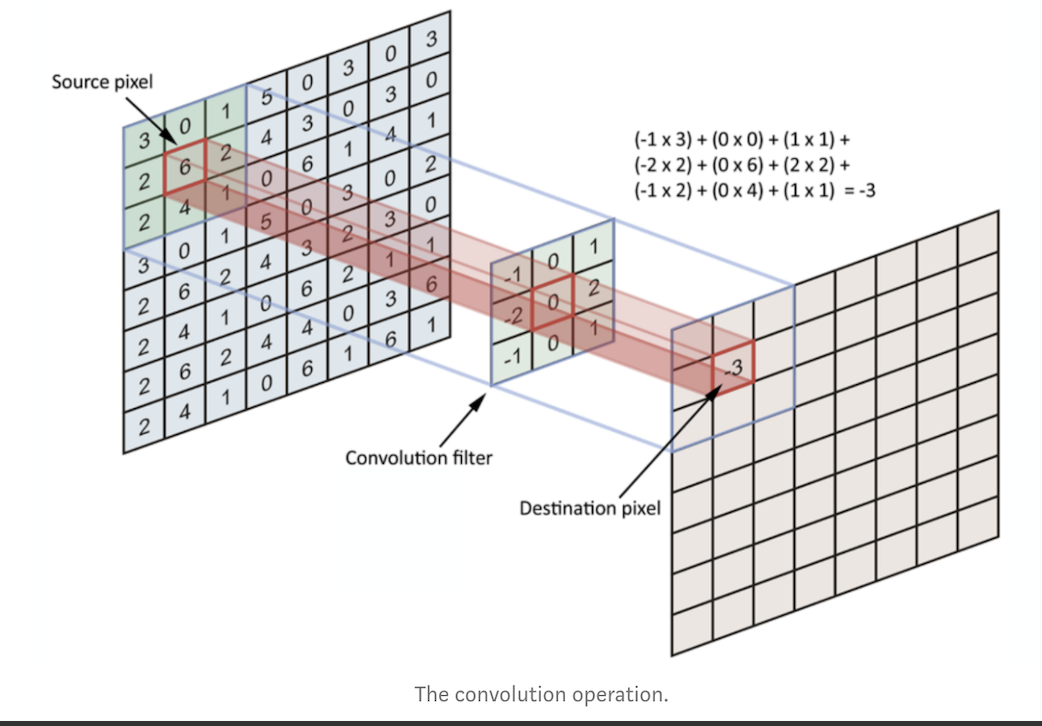

SOURCE: https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.neural_network import MLPClassifier
%matplotlib inline
from skimage.transform import resize
import seaborn as sns
from collections import Counter
import os
from glob import iglob, glob

In [2]:
# Import various componenets for model building

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from sklearn import metrics
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

# Import the backend
from keras import backend as K

from numpy.random import seed
seed(4)
from tensorflow import set_random_seed
set_random_seed(4)
tf.__version__

Using TensorFlow backend.


'1.14.0'

In [3]:
keras.__version__

'2.2.4'

In [4]:
# Reading the csv file into a dataframe
all_data = pd.read_csv('/kaggle/input/data/Data_Entry_2017.csv')

In [5]:
# Retrieving the paths of the images which are present in different zip folders images01, images02 etc..    
from glob import glob

image_glob = glob('/kaggle/input/data/images*/images/*.png')
print('Number of rows/images: ', len(image_glob)) 

# Delete un-necessary columns
all_data = all_data.iloc[:,0:2 ]

# copying the path into the data_df column
full_img_paths = {os.path.basename(x): x for x in image_glob}
all_data['path'] = all_data['Image Index'].map(full_img_paths.get)
all_data = all_data.sample(frac=1, replace=False, random_state=108)
all_data.reset_index(drop=True, inplace=True)

Number of rows/images:  112120


In [6]:
all_data.head()

Image Index                        ...                                                                       path
0  00020393_005.png                        ...                          /kaggle/input/data/images_009/images/00020393_...
1  00028204_000.png                        ...                          /kaggle/input/data/images_012/images/00028204_...
2  00006447_009.png                        ...                          /kaggle/input/data/images_003/images/00006447_...
3  00018316_000.png                        ...                          /kaggle/input/data/images_008/images/00018316_...
4  00014924_000.png                        ...                          /kaggle/input/data/images_007/images/00014924_...

[5 rows x 3 columns]

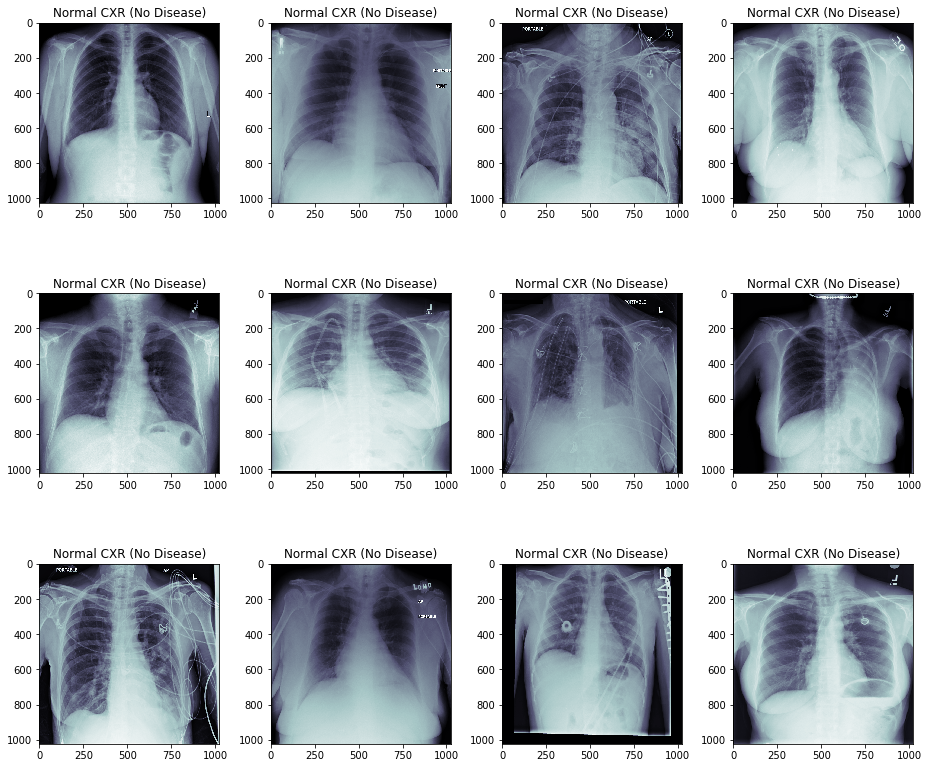

In [7]:
# Displaying 8 CXRs of No Disease or No Finding class
# Observe the variety in each class
fig, axs = plt.subplots(3, 4, figsize = (13, 13))
for (i, ax) in zip(range(12), axs.flat): 
    image = imread(all_data.path[all_data['Finding Labels']=='No Finding'][15:30].values[i])
    ax.set_title("Normal CXR (No Disease)")
    ax.imshow(image, cmap='bone')
    plt.tight_layout()

We can observe from the above figure that there is a lot of variation in just the major class or normal CXRs, i.e the X-rays without disease. It is hard to say from the above pictures if all belong to one class. There is hard to find strong pattern in all the above. It will be even hard to observe the pattern once we see the CXRs from other classes below.

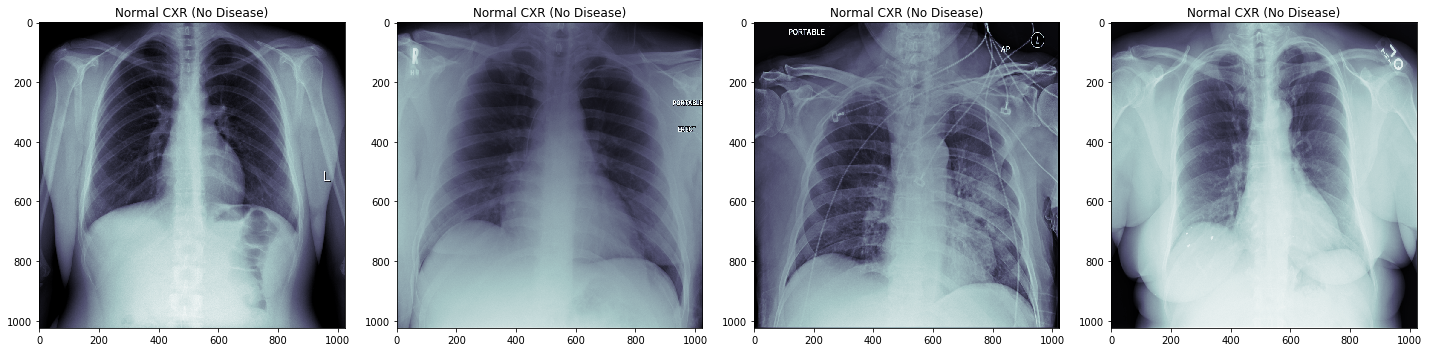

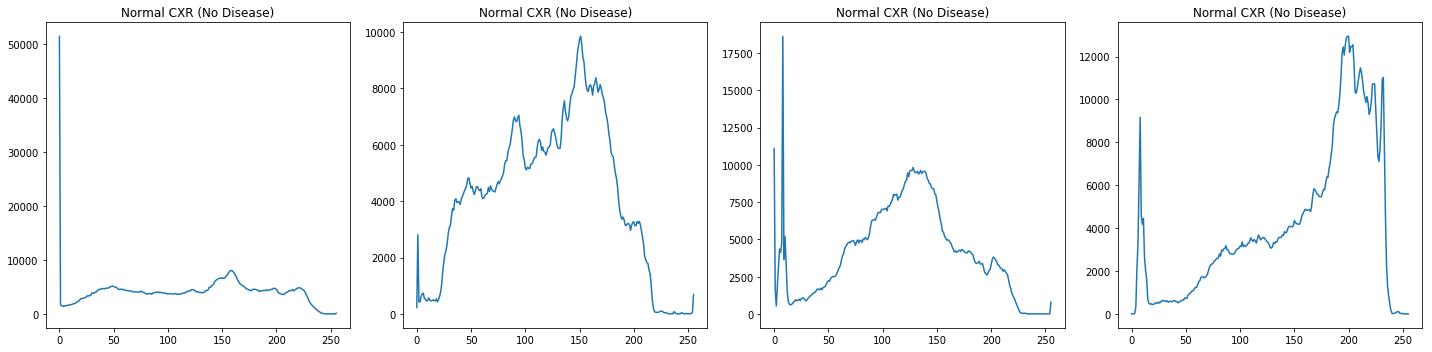

In [8]:

# Image Histograms showing the distribution of grey pixels between black -0 and white 255 on x axis.
import cv2
fig, axs = plt.subplots(1, 4, figsize = (13, 5))
for (i, ax) in zip(range(4), axs.flat): 
    image = imread(all_data.path[all_data['Finding Labels']=='No Finding'][15:30].values[i])
    ax.set_title("Normal CXR (No Disease)")
    ax.imshow(image, cmap='bone')
    plt.tight_layout()
    
fig, axs = plt.subplots(1, 4, figsize = (20, 5))
for (i, ax) in zip(range(4), axs.flat): 
    ax.set_title("Normal CXR (No Disease)")
    # reads an input image 
    img = cv2.imread(all_data.path[all_data['Finding Labels']=='No Finding'][15:30].values[i]) 
    # find frequency of pixels in range 0-255 
    histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
    # show the plotting graph of an image 
    ax.plot(histr)       
    plt.tight_layout()

Pixel values and grayscale pixels are an important parameter or feature for the model to find patters betweent he classes. The model will try to find the distribtuion of 
pixels/grayscale pizels 

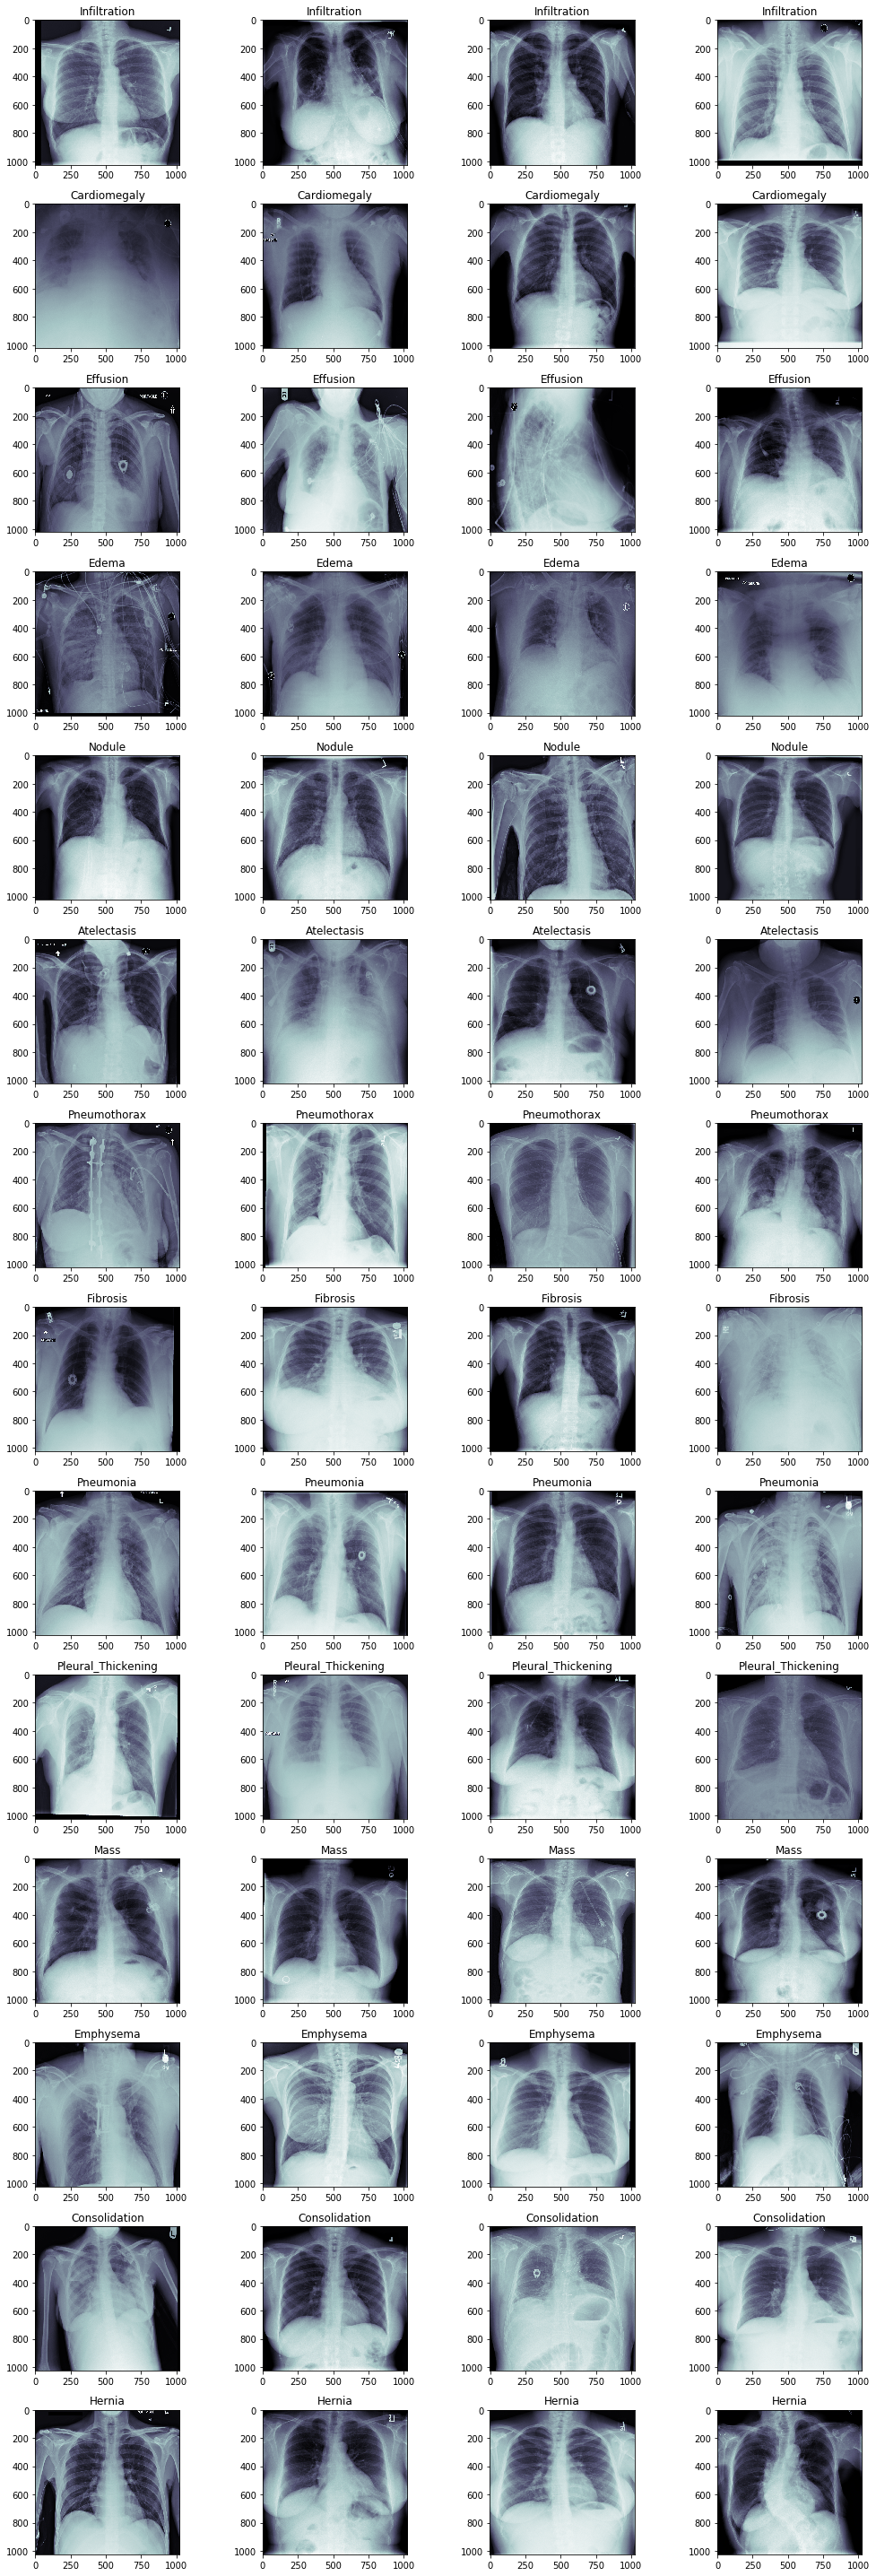

In [9]:
# Displaying 4 CXRs in each row for each class (14 classes) of disease
path_list = []
image_labels = []
slicedf = all_data[all_data['Finding Labels']!='No Finding']
labels = [item for item in slicedf['Finding Labels'].unique() if  '|' not in item ]

for eachClass in labels:
      for i in range(4):
        path_list.append(all_data.path[all_data['Finding Labels']==eachClass][0:4].values[i])
        image_labels.append(eachClass)        
fig, axs = plt.subplots(14, 4, figsize=(15, 40))
i=0
for (label, ax) in zip(image_labels, axs.flat):   
        image = imread(path_list[i])
        ax.set_title(label)
        ax.imshow(image, cmap='bone')
        plt.tight_layout()
        i+=1

Above each row has one disease type. Total there are 14 rows or panels in the above figure. We can see above that each row has lot of variation again in the CXRs of the same class and there are overlapping patterns from other classes, if observed in comparison with other classes.

#### Multi Label Multi Class problem

Not only does the dataset has 14 classes but some of the CXRs or samples have multiple labels in each sample.i.e a Multi-label multiclass problem.

In [10]:
# Single label classes count in the entire dataset
all_data[all_data['Finding Labels'].str.split("|").str.len() == 1]['Finding Labels'].value_counts()

No Finding            60361
Infiltration           9547
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pneumothorax           2194
Mass                   2139
Consolidation          1310
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Fibrosis                727
Edema                   628
Pneumonia               322
Hernia                  110
Name: Finding Labels, dtype: int64

In [11]:
# True counts per 15 classes only out of a total of 6978 instances of each label ie. including multi-label rows.
counts = all_data['Finding Labels'].apply(lambda x:x.split("|"))

Class_counts = dict(Counter([item for value in counts for item in value ]))
Class_counts

{'Consolidation': 4667,
 'Nodule': 6331,
 'Infiltration': 19894,
 'No Finding': 60361,
 'Cardiomegaly': 2776,
 'Edema': 2303,
 'Effusion': 13317,
 'Mass': 5782,
 'Pleural_Thickening': 3385,
 'Pneumothorax': 5302,
 'Fibrosis': 1686,
 'Atelectasis': 11559,
 'Emphysema': 2516,
 'Pneumonia': 1431,
 'Hernia': 227}

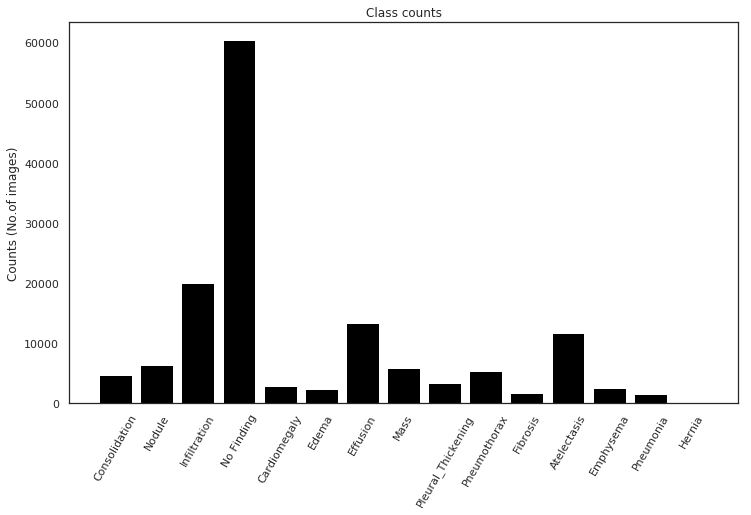

In [12]:
# Bar graph
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style('white')
plt.bar(range(len(Class_counts)), Class_counts.values(), align='center', color='black')
plt.title("Class counts")
plt.ylabel("Counts (No.of images)")
plt.xticks(range(len(Class_counts)), list(Class_counts.keys()), rotation=60)
plt.show()

In [13]:
# Expressing as a percentage
percent = {item:round(Class_counts[item]/sum(Class_counts.values())*100,2) for item in Class_counts}
percent

{'Consolidation': 3.3,
 'Nodule': 4.47,
 'Infiltration': 14.06,
 'No Finding': 42.65,
 'Cardiomegaly': 1.96,
 'Edema': 1.63,
 'Effusion': 9.41,
 'Mass': 4.09,
 'Pleural_Thickening': 2.39,
 'Pneumothorax': 3.75,
 'Fibrosis': 1.19,
 'Atelectasis': 8.17,
 'Emphysema': 1.78,
 'Pneumonia': 1.01,
 'Hernia': 0.16}

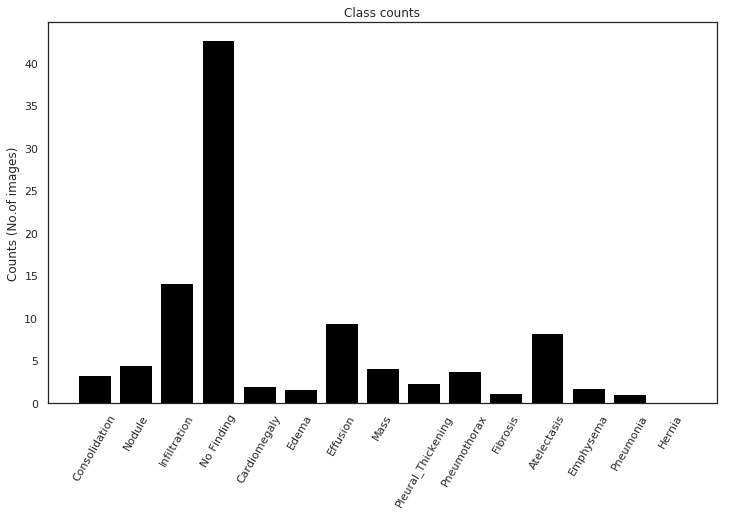

In [14]:

# Percentage bar graph
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style('white')
plt.bar(range(len(percent)), percent.values(), align='center', color='black')
plt.title("Class counts")
plt.ylabel("Counts (No.of images)")
plt.xticks(range(len(percent)), list(percent.keys()), rotation=60)
plt.show()

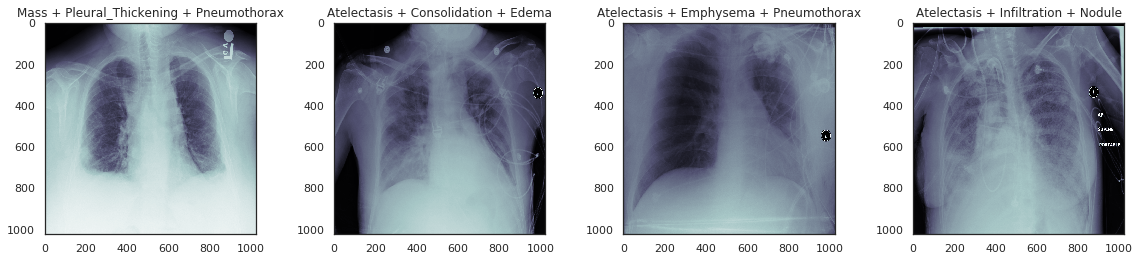

In [15]:
# Displaying CXRs which have multilabel in one image.

sns.set_style('white')
path_list = []
image_labels = []
for i, item in enumerate(all_data['Finding Labels']):
    if len(item.split("|")) > 2:
        path_list.append(all_data.loc[i, 'path'])
        image_labels.append(' + '.join(all_data.loc[i, 'Finding Labels'].split('|')))
    if len(path_list)>4:
        break

fig, axs = plt.subplots(1, 4, figsize=(16, 10))
i=0
for (label, ax) in zip(image_labels, axs.flat):   
        image = imread(path_list[i])
        ax.set_title(label)
        ax.imshow(image, cmap='bone')
        plt.tight_layout()
        i+=1

# 2. Challenge I Classification - Solution: Binary

### Creating two classes No Disease and Disease. Instead of taking all the diseases considering as multiclass  preliminarliy tried one of the disease(Ex.'Edema') and No Disease i.e., BINARY classfication of images.  And we can run the model to experiment if it can distinguish Disease and No Disease CXRs.

In [16]:
labels = [item for item in all_data['Finding Labels'].unique() if  '|' not in item ]
labels

['Infiltration',
 'No Finding',
 'Cardiomegaly',
 'Effusion',
 'Edema',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Fibrosis',
 'Pneumonia',
 'Pleural_Thickening',
 'Mass',
 'Emphysema',
 'Consolidation',
 'Hernia']

In [17]:
all_data.head()

Image Index                        ...                                                                       path
0  00020393_005.png                        ...                          /kaggle/input/data/images_009/images/00020393_...
1  00028204_000.png                        ...                          /kaggle/input/data/images_012/images/00028204_...
2  00006447_009.png                        ...                          /kaggle/input/data/images_003/images/00006447_...
3  00018316_000.png                        ...                          /kaggle/input/data/images_008/images/00018316_...
4  00014924_000.png                        ...                          /kaggle/input/data/images_007/images/00014924_...

[5 rows x 3 columns]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


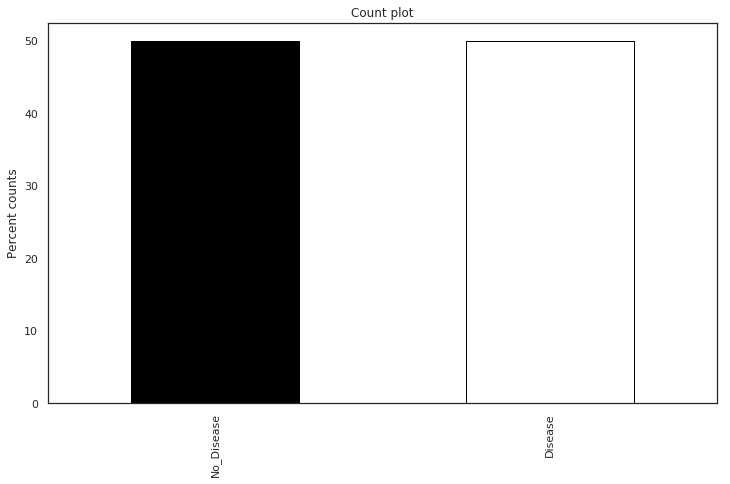

(1256, 7)

In [18]:
# Creating Binary fields

# Picked one disease from the 14 diseases 'Edema'. We can apply similar classifcation to other diseases aswell.
#Taking same number of No Disease samples as that of disease sanples....virtually no class imbalance as also can be seen by a plot below.
dataframe_disease = all_data[all_data['Finding Labels'] == 'Edema']
dataframe_No_disease = all_data[all_data['Finding Labels'] == 'No Finding'].sample(dataframe_disease.shape[0],
                                                                                   replace=False, random_state=107)
dataframe_No_disease['Binary_class'] = 'No_Disease'
dataframe_disease['Binary_class'] = 'Disease'
data_df = pd.concat([dataframe_No_disease, dataframe_disease ], axis=0)
data_df = data_df.sample(frac=1, replace=False, random_state=107)

dfnew=data_df['Binary_class'].str.get_dummies()
data_df=data_df.assign(Disease=dfnew['Disease'], No_Disease=dfnew['No_Disease'])
data_df['disease_vec'] = data_df['Disease'].apply(lambda x: [x, 1-x])

fig = data_df['Binary_class'].value_counts(normalize=True)*100
fig.plot(kind='bar', color=['black', 'white'], edgecolor='black')
plt.ylabel("Percent counts")
plt.title('Count plot')
plt.show()

data_df = data_df.sample(frac=1, replace=False, random_state=107)
data_df.reset_index(drop=True, inplace=True)
data_df.shape


In [19]:
data_df.head()

Image Index Finding Labels     ...     No_Disease disease_vec
0  00003491_000.png     No Finding     ...              1      [0, 1]
1  00025849_010.png          Edema     ...              0      [1, 0]
2  00001237_001.png     No Finding     ...              1      [0, 1]
3  00018972_007.png          Edema     ...              0      [1, 0]
4  00017356_008.png          Edema     ...              0      [1, 0]

[5 rows x 7 columns]

In [20]:
#Taking a subset of the data since the models are taking long time to run and out of memory or resource errors.
data = data_df.sample(frac=0.2, replace=False, random_state=107)
data_path = data['path'].values

In [21]:
# Converting images into numpy arrays and normalization of array data

images_array = np.zeros([len(data),224,224,1])
for i, x in enumerate(data_path):
    image = resize(imread(x, as_gray=True), (224, 224, 1))
    image/=255
    images_array[i] = image
print ("Train images processed into numpy arrays, shape is", images_array.shape)    

X = images_array.reshape(len(images_array),224*224)
Y = np.asarray(data['Disease'])

Train images processed into numpy arrays, shape is (251, 224, 224, 1)


# 3. Implementation of Binary classification with RFC, GBC, SVC and MLP

Applied the best models that I have learnt at Thinkful to initial test of the data modelling.

In [22]:
def model_run(mod, X=X, Y=Y):
    model_object=mod
    #Data split to Train and test
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=107)
    model_object.fit(X_train, y_train)
    print ("Model train score is %0.2f" % (model_object.score(X_train, y_train)) )
    evaluation(model_object)
    return 
def evaluation(model_object):
    #Evalution of model
    score=cross_val_score(X=X_test, y=y_test, estimator=model_object, cv=10)
    print ('\nCross_validation scores :\n', score)
    print("\nMean/test accuracy: %0.2f (+/- %0.2f)\n" % (score.mean(), score.std() * 2))
    return


In [23]:

model_run(RandomForestClassifier())

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model train score is 0.98

Cross_validation scores :
 [0.625      0.71428571 0.66666667 0.33333333 0.66666667 0.83333333
 0.66666667 0.66666667 0.66666667 0.83333333]

Mean/test accuracy: 0.67 (+/- 0.26)



In [24]:
model_run(GradientBoostingClassifier())

Model train score is 1.00

Cross_validation scores :
 [0.75       0.57142857 0.5        0.5        0.83333333 0.66666667
 0.5        0.83333333 0.5        0.66666667]

Mean/test accuracy: 0.63 (+/- 0.26)



In [25]:
model_run(SVC(gamma='auto', kernel='linear' ))

Model train score is 0.52

Cross_validation scores :
 [0.5        0.57142857 0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5       ]

Mean/test accuracy: 0.51 (+/- 0.04)



In [26]:
model_run(MLPClassifier(solver='lbfgs', early_stopping=True))

Model train score is 0.81

Cross_validation scores :
 [0.625      0.42857143 0.66666667 0.66666667 0.66666667 0.83333333
 0.5        0.66666667 1.         0.66666667]

Mean/test accuracy: 0.67 (+/- 0.30)



Accuracy is low and needs to be improved

# 4. Challenge II Improve accuracy - Solution: Hyper parameter tuning by GSCV

In [27]:
'''''''''
from sklearn.model_selection import GridSearchCV
# fix random seed for reproducibility
seed = 4
np.random.seed(seed)
# define the grid search parameters

def GSCV(param_grid, model):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
    print ("Now fitting to the grid and searching for best parameters")
    grid_result = grid.fit(X, Y)
    # summarize results
    print ("\n \n The grid search results for :", str(model))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    print ('/n')
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))



#Random Forest Classifier
# define the grid search parameters
param_grid = {
                'n_estimators':  [50, 100, 200],
                "max_features": ['auto', 'sqrt', 'log2'],
                "criterion": ['entropy'],
                "max_depth": [4, 6, 8],
                "oob_score": [True],
                "class_weight": ['balanced']
            }

# create model
model = RandomForestClassifier()
GSCV(param_grid, model)

#Gradeint Boost Classifier
# define the grid search parameters

param_grid = {
                "n_estimators":[250,500, 750],
                "max_depth":[2, 3, 4, 5],
                "learning_rate":[0.01, 0.1 ,1]
            }

# create model
model = GradientBoostingClassifier()
GSCV(param_grid, model)

#Support Vector machine
# define the grid search parameters

param_grid = {
                'gamma':['auto'],
                'kernel': ['poly'],
                'C': [1000, 100, 10, 0.1, 0.01]         
            }

# create model
model = SVC()
GSCV(param_grid, model)

#Multi layer Perceptron
# define the grid search parameters

param_grid = {
                'hidden_layer_sizes':[(1000, 2), (100, 8), (1000, 4)],
                'activation': ['relu', 'logistic'],
                'alpha': [ 0.00001, 0.0001, 0.001],
                'solver': ['lbfgs', 'sgd', 'adam'],
                'learning_rate': ['constant', 'invscaling', 'adaptive'],
                'max_iter': [100, 200, 300],
                'early_stopping': [True]   
            }

# create model
model = MLPClassifier()
GSCV(param_grid, model)
'''''''''

'\nfrom sklearn.model_selection import GridSearchCV\n# fix random seed for reproducibility\nseed = 4\nnp.random.seed(seed)\n# define the grid search parameters\n\ndef GSCV(param_grid, model):\n    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)\n    print ("Now fitting to the grid and searching for best parameters")\n    grid_result = grid.fit(X, Y)\n    # summarize results\n    print ("\n \n The grid search results for :", str(model))\n    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\n\n    means = grid_result.cv_results_[\'mean_test_score\']\n    stds = grid_result.cv_results_[\'std_test_score\']\n    params = grid_result.cv_results_[\'params\']\n    print (\'/n\')\n    for mean, stdev, param in zip(means, stds, params):\n        print("%f (%f) with: %r" % (mean, stdev, param))\n\n\n\n#Random Forest Classifier\n# define the grid search parameters\nparam_grid = {\n                \'n_estimators\':  [50, 100, 200],\n     

The above code was run in a diffent notebook for lack of memory and GPU resource and the results are pasted below. 

Best parameters for Random Forest Classifier:

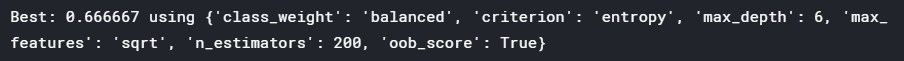[](http://)

Best parameters for Gradient Boositng Classifier:

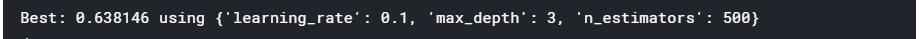

Best parameters for Support Vector Machine Classifier:

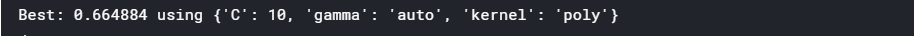

Applying these parameters now to the models and analyse the reults.

In [28]:
params = {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200,
          'oob_score': True, 'n_jobs': -1, 'random_state': 4}
model_run(RandomForestClassifier(**params))

Model train score is 1.00

Cross_validation scores :
 [0.75       0.71428571 0.66666667 0.5        0.66666667 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333]

Mean/test accuracy: 0.75 (+/- 0.21)



In [29]:
params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'random_state': 4}
model_run(GradientBoostingClassifier(**params))

Model train score is 1.00

Cross_validation scores :
 [0.75       0.71428571 0.5        0.5        0.83333333 0.66666667
 0.5        0.83333333 0.33333333 0.66666667]

Mean/test accuracy: 0.63 (+/- 0.31)



In [30]:
params = {'C': 10, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 4}
model_run(SVC(**params))

Model train score is 0.51

Cross_validation scores :
 [0.5        0.71428571 0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5       ]

Mean/test accuracy: 0.52 (+/- 0.13)



In [31]:
params ={'hidden_layer_sizes': (1000, 8),
        'early_stopping': True,
        'random_state': 4,
        'learning_rate_init': 0.01}
model_run(MLPClassifier(**params))

Model train score is 0.77

Cross_validation scores :
 [0.625      0.42857143 0.66666667 0.66666667 0.83333333 0.66666667
 1.         0.66666667 0.5        0.5       ]

Mean/test accuracy: 0.66 (+/- 0.32)



### Conclusions:

#### We see here that all the 4 models, Random Forest classifier outperformed others both in accuracy and low-error rate. There is an increase in Test accuracy by doing a GridSearchCV i.e from around 63% to around 75%.

# 5. Implementation of  Neural net CNN


In [32]:
# Splitting data into train, test and valid data.
train_df, test_df = train_test_split(data_df, test_size = 0.1, random_state = 107)
train_df, valid_df = train_test_split(train_df, test_size=0.25, random_state= 107)


In [33]:
# Setting the paths and labels for train, valid and test

X_train = train_df['path'].values.tolist()
y_train = train_df['Disease'].values

X_valid = valid_df['path'].values.tolist()
y_valid = valid_df['Disease'].values

X_test = test_df['path'].values.tolist()
y_test = test_df['Disease'].values

In [34]:
# Converting images into numpy arrays and normalization of array data
images_train = np.zeros([len(X_train),256,256,1])
for i, x in enumerate(X_train):
    image = resize(imread(x, as_gray=True), (256, 256, 1))/255
    images_train[i] = image
print ("Train images processed into numpy arrays, shape is", images_train.shape)    
    
images_valid = np.zeros([len(X_valid),256,256,1])
for i, x in enumerate(X_valid):
    image = resize(imread(x, as_gray=True), (256, 256, 1))/255
    images_valid[i] = image
print ("Validation images processed into numpy arrays, shape is", images_valid.shape)   

images_test = np.zeros([len(X_test),256,256,1])
for i, x in enumerate(X_test):
    image = resize(imread(x, as_gray=True), (256, 256, 1))/255
    images_test[i] = image
print ("Test images processed into numpy arrays, shape is", images_test.shape)


Train images processed into numpy arrays, shape is (847, 256, 256, 1)
Validation images processed into numpy arrays, shape is (283, 256, 256, 1)
Test images processed into numpy arrays, shape is (126, 256, 256, 1)


In [35]:
'''''''''
# Saving the image arrays on disk
np.save('/kaggle/working/images_withMC_train.npy', images_train)
np.save('/kaggle/working/images_withMC_valid.npy', images_valid)
np.save('/kaggle/working/images_withMC_test.npy', images_test)
'''''''''

"\n# Saving the image arrays on disk\nnp.save('/kaggle/working/images_withMC_train.npy', images_train)\nnp.save('/kaggle/working/images_withMC_valid.npy', images_valid)\nnp.save('/kaggle/working/images_withMC_test.npy', images_test)\n"

In [36]:
'''''''''
# Loading the image arrays from disk
images_train = np.load('/kaggle/working/images_withMC_train.npy')
images_valid = np.load('/kaggle/working/images_withMC_valid.npy')
images_test = np.load('/kaggle/working/images_withMC_test.npy')
'''''''''

"\n# Loading the image arrays from disk\nimages_train = np.load('/kaggle/working/images_withMC_train.npy')\nimages_valid = np.load('/kaggle/working/images_withMC_valid.npy')\nimages_test = np.load('/kaggle/working/images_withMC_test.npy')\n"

In [37]:
# Creating a sequential keras CNN model
# ConvD layers and Maxpooling  followed by batch normalization and dropout.
model1 = Sequential()
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=5)
model1.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (256,256,1)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))


model1.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))


model1.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

# add in fully connected dense layers to model, then output classifiction probabilities using a sigmoid activation function
model1.add(Flatten())
model1.add(Dense(512, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation = 'sigmoid'))

# compile model, run summary
model1.compile(optimizers.Adam(), loss='binary_crossentropy', metrics=['binary_accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
__________

In [38]:
# Using a call back function here called reduce_lr which will decrease the learning rate whenever the val_loss plateaus.
# I have set the patience to 2 so that for every two consecutive epochs the val_loss plateaus it will drop the learning rate by 1/10 th.
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00000001, verbose=1)

history = model1.fit(images_train, y_train,verbose=1, batch_size=16, epochs=30, validation_data=(images_valid, y_valid) ,
                    callbacks=[reduce_lr]
            )
                  

Train on 847 samples, validate on 283 samples
Epoch 1/30
847/847 [==============================] - 8s 10ms/step - loss: 7.8141 - binary_accuracy: 0.5053 - val_loss: 8.0299 - val_binary_accuracy: 0.5018
Epoch 2/30
847/847 [==============================] - 3s 3ms/step - loss: 8.0495 - binary_accuracy: 0.5006 - val_loss: 4.4895 - val_binary_accuracy: 0.6678
Epoch 3/30
847/847 [==============================] - 3s 3ms/step - loss: 8.0495 - binary_accuracy: 0.5006 - val_loss: 8.0101 - val_binary_accuracy: 0.5018
Epoch 4/30
847/847 [==============================] - 3s 3ms/step - loss: 8.0495 - binary_accuracy: 0.5006 - val_loss: 7.9736 - val_binary_accuracy: 0.5053

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
847/847 [==============================] - 3s 3ms/step - loss: 8.0495 - binary_accuracy: 0.5006 - val_loss: 7.9736 - val_binary_accuracy: 0.5053
Epoch 6/30
847/847 [==============================] - 3s 3ms/step - loss: 8.0495 - binary_a

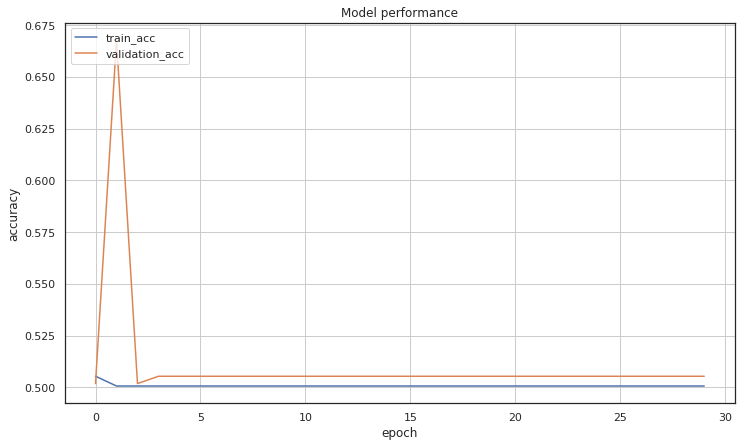

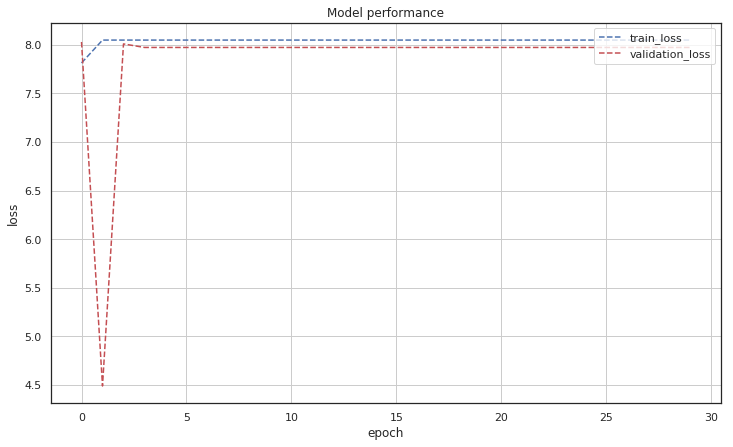

In [39]:
def history_plot(history):
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model performance')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_acc', 'validation_acc'], loc='upper left')
    plt.grid()
    plt.show()
    plt.plot(history.history['loss'], 'b--')
    plt.plot(history.history['val_loss'], 'r--')
    plt.title('Model performance')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='upper right')
    plt.grid()
    plt.show()

history_plot(history)

In [40]:
#Evaluate the model

score = model1.evaluate(images_test, y_test, batch_size=images_test.shape[0], verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

126/126 [==============================] - 1s 6ms/step
Test loss: 8.31489086151123
Test accuracy: 0.4841269850730896


In [41]:
pred_class = model1.predict_classes(images_test,batch_size=images_test.shape[0],verbose=1)
y_pred = pred_class.reshape(images_test.shape[0],)
y_true = y_test

126/126 [==============================] - 0s 3ms/step


In [42]:
print ('number of Disease X-rays',sum(y_true))
print ('number of Disease X-rays predicted',sum(y_pred))
print ('Percentage of Disease X-rays',sum(y_true)/y_true.shape[0]*100)
print ('Percentage of Disease X-rays predicted',sum(y_pred)/y_pred.shape[0]*100)

number of Disease X-rays 65
number of Disease X-rays predicted 0
Percentage of Disease X-rays 51.587301587301596
Percentage of Disease X-rays predicted 0.0


In [43]:
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        61
           1       0.00      0.00      0.00        65

    accuracy                           0.48       126
   macro avg       0.24      0.50      0.33       126
weighted avg       0.23      0.48      0.32       126



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


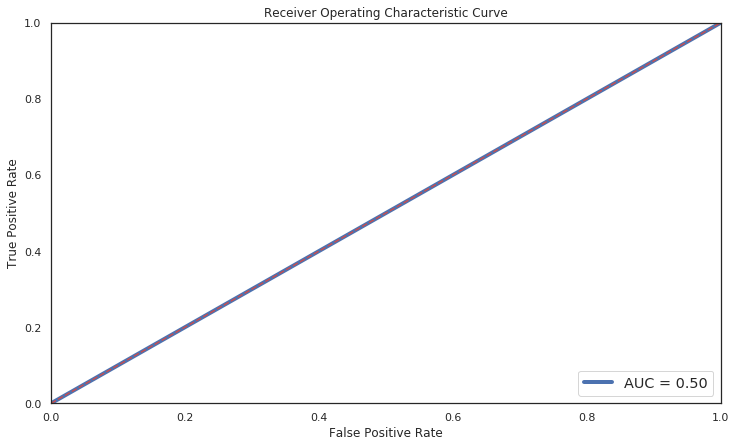

The sensitivity i.e true positives is 100.000000% 
The specificity i.e true negatives is 0.000000% 
The Type I error i.e. false negatives is 0.000000% 
The Type II error i.e. false positives is 100.000000% 


In [44]:

#Plotting the Learning curve   
fpr, tpr, threshold = metrics.roc_curve(y_true.ravel(), y_pred.ravel())
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', linewidth=4,label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right', fancybox=True, fontsize='large')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr=fpr[1]
tpr=tpr[1]
print ('The sensitivity i.e true positives is {0:2f}% '.format(tpr*100))
print ('The specificity i.e true negatives is {0:2f}% '.format((1-fpr)*100))
print ('The Type I error i.e. false negatives is {0:2f}% '.format((1-tpr)*100))
print ('The Type II error i.e. false positives is {0:2f}% '.format(fpr*100))


### Conclusion:
### The train and test accuracies are both lower and the loss is not declining indicating that model is not learning anything here.
### To improve accuracy used Custom metric function called roc_auc.

### To improve accuracy used custom metric function roc_auc below...but did observe any increase in accuracy (results not shown)

In [45]:
from keras import backend
def roc_auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

# 6. Challenge III Improve  CNN accuracy - Solution: Hyper parameter tuning/GSCV

In [46]:
'''''''''
def create_model(loss, lr=0.001, decay=1e-6,metrics=metrics):
    def roc_auc(y_true, y_pred):
        auc = tf.metrics.auc(y_true, y_pred)[1]
        K.get_session().run(tf.local_variables_initializer())
        return auc
    model = Sequential()
   #keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4)
    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (256,256,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.05))


    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.05))

    model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.05))

    # add in fully connected dense layers to model, then output classifiction probabilities using a sigmoid activation function
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1, activation = 'sigmoid'))

    # compile model, run summary
    model.compile(optimizers.Adam(lr=lr, decay=decay), loss=loss, metrics=[metrics])
    return model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# fix random seed for reproducibility
seed = 4
np.random.seed(seed)

# define the grid search parameters

lr = [0.1, 0.01, 0.001, 0.0001]
decay = [1e-4, 1e-5, 1e-6, 1e-7]
metrics = ['acc']
loss = ['binary_crossentropy']

param_grid = dict(loss=loss,metrics=metrics, lr=lr, decay=decay)

# create model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=128, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
print ("Now fitting to the grid and searching for best parameters")
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
'''''''''

'\ndef create_model(loss, lr=0.001, decay=1e-6,metrics=metrics):\n    def roc_auc(y_true, y_pred):\n        auc = tf.metrics.auc(y_true, y_pred)[1]\n        K.get_session().run(tf.local_variables_initializer())\n        return auc\n    model = Sequential()\n   #keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4)\n    model.add(Conv2D(filters = 32, kernel_size = 3, padding = \'same\', activation = \'relu\', input_shape = (256,256,1)))\n    model.add(BatchNormalization())\n    model.add(MaxPooling2D(pool_size = (2, 2)))\n    model.add(Dropout(0.05))\n\n\n    model.add(Conv2D(filters = 64, kernel_size = 3, padding = \'same\', activation = \'relu\'))\n    model.add(BatchNormalization())\n    model.add(MaxPooling2D(pool_size = (2, 2)))\n    model.add(Dropout(0.05))\n\n    model.add(Conv2D(filters = 128, kernel_size = 3, padding = \'same\', activation = \'relu\'))\n    model.add(BatchNormalization())\n    model.add(MaxPooling2D(pool_size = (2, 2)))\n    model.add(Dropout(0.05))\n\

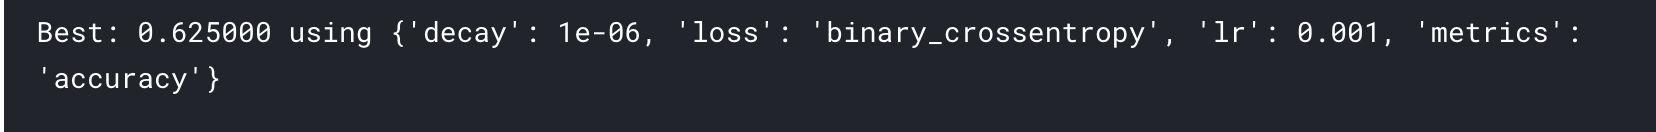

Running the Neural net again with the best parameters found.

In [47]:
# Creating a sequential keras CNN model
# ConvD layers and Maxpooling  followed by batch normalization and dropout.
model2 = Sequential()
#keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=5)
model2.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (256,256,1)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))


model2.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))


model2.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

# add in fully connected dense layers to model, then output classifiction probabilities using a sigmoid activation function
model2.add(Flatten())
model2.add(Dense(512, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))

# compile model, run summary
model2.compile(optimizers.Adam(lr=0.0001, decay=1e-6), loss='binary_crossentropy', metrics=['binary_accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
__________

In [48]:
# Using a call back function here called reduce_lr which will decrease the learning rate whenever the val_loss plateaus.
# I have set the patience to 2 so that for every two consecutive epochs the val_loss plateaus it will drop the learning rate by 1/10 th.

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00000001, verbose=1)

history = model2.fit(images_train, y_train,verbose=1, batch_size=16, epochs=30, validation_data=(images_valid, y_valid) ,
                    callbacks=[reduce_lr]
            )
                  

Train on 847 samples, validate on 283 samples
Epoch 1/30
847/847 [==============================] - 5s 6ms/step - loss: 1.2828 - binary_accuracy: 0.7048 - val_loss: 0.6893 - val_binary_accuracy: 0.7067
Epoch 2/30
847/847 [==============================] - 3s 3ms/step - loss: 0.5510 - binary_accuracy: 0.7733 - val_loss: 0.9603 - val_binary_accuracy: 0.5300
Epoch 3/30
847/847 [==============================] - 3s 3ms/step - loss: 0.4563 - binary_accuracy: 0.8205 - val_loss: 0.9404 - val_binary_accuracy: 0.6113

Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 4/30
847/847 [==============================] - 3s 3ms/step - loss: 0.3977 - binary_accuracy: 0.8359 - val_loss: 0.8778 - val_binary_accuracy: 0.6466
Epoch 5/30
847/847 [==============================] - 3s 3ms/step - loss: 0.3807 - binary_accuracy: 0.8536 - val_loss: 0.9684 - val_binary_accuracy: 0.6113

Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Epoch 6/30
8

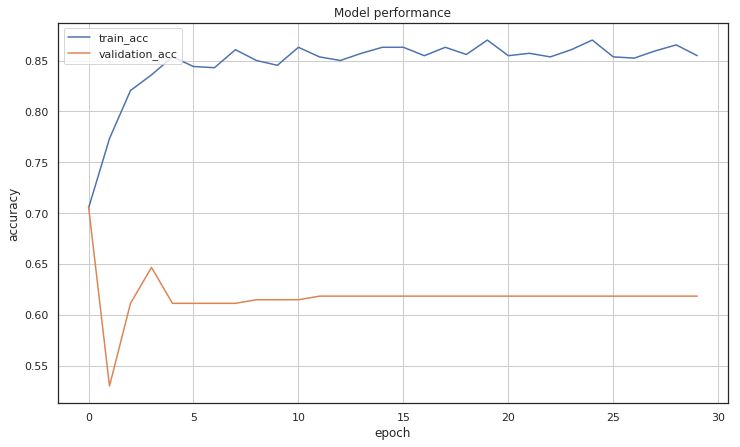

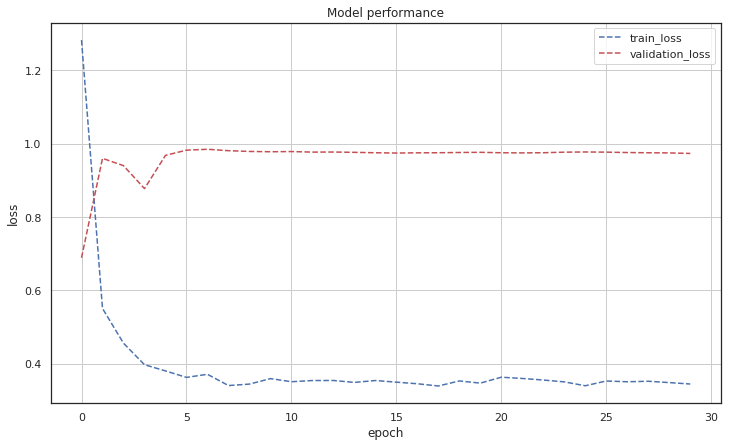

In [49]:
def history_plot(history):
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model performance')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_acc', 'validation_acc'], loc='upper left')
    plt.grid()
    plt.show()
    plt.plot(history.history['loss'], 'b--')
    plt.plot(history.history['val_loss'], 'r--')
    plt.title('Model performance')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='upper right')
    plt.grid()
    plt.show()

history_plot(history)

In [50]:
#Evaluate the model

score = model2.evaluate(images_test, y_test, batch_size=images_test.shape[0], verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

126/126 [==============================] - 0s 1ms/step
Test loss: 0.8168652057647705
Test accuracy: 0.6746031641960144


In [51]:
pred_class = model2.predict_classes(images_test,batch_size=images_test.shape[0],verbose=1)
y_pred = pred_class.reshape(images_test.shape[0],)
y_true = y_test

126/126 [==============================] - 0s 3ms/step


In [52]:
print ('number of Disease X-rays',sum(y_true))
print ('number of Disease X-rays predicted',sum(y_pred))
print ('Percentage of Disease X-rays',sum(y_true)/y_true.shape[0]*100)
print ('Percentage of Disease X-rays predicted',sum(y_pred)/y_pred.shape[0]*100)

number of Disease X-rays 65
number of Disease X-rays predicted 40
Percentage of Disease X-rays 51.587301587301596
Percentage of Disease X-rays predicted 31.746031746031743


In [53]:
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72        61
           1       0.80      0.49      0.61        65

    accuracy                           0.67       126
   macro avg       0.71      0.68      0.67       126
weighted avg       0.71      0.67      0.66       126



## Conclusion:
### There is big increase in test accuracy and also lower error rate (AUC). Test accuracy increased from 48% to 73%. The F1 score also improved and is more closer to one now.

# 7. Challenge VI Overfitting - Solution: Image/Data Augmentation

In [54]:
data_df.head()

Image Index Finding Labels     ...     No_Disease disease_vec
0  00003491_000.png     No Finding     ...              1      [0, 1]
1  00025849_010.png          Edema     ...              0      [1, 0]
2  00001237_001.png     No Finding     ...              1      [0, 1]
3  00018972_007.png          Edema     ...              0      [1, 0]
4  00017356_008.png          Edema     ...              0      [1, 0]

[5 rows x 7 columns]

In [55]:
X_train, X_test = train_test_split(data_df, test_size=0.25, random_state=107)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [56]:
X_train.head()

Image Index Finding Labels     ...     No_Disease disease_vec
0  00014380_006.png     No Finding     ...              1      [0, 1]
1  00006682_000.png     No Finding     ...              1      [0, 1]
2  00009831_000.png     No Finding     ...              1      [0, 1]
3  00004646_005.png          Edema     ...              0      [1, 0]
4  00008042_014.png     No Finding     ...              1      [0, 1]

[5 rows x 7 columns]

In [57]:
# Data Augmentation
datagen=ImageDataGenerator(rescale=1./255., validation_split=0.25,
                            shear_range=0.2,
                           zoom_range=0.2,
                           rotation_range=5,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           horizontal_flip=True)
       
test_datagen=ImageDataGenerator(rescale=1./255.,
                            shear_range=0.2,
                           zoom_range=0.2,
                           rotation_range=5,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           horizontal_flip=True)

train_generator=datagen.flow(images_train, y_train, shuffle=True, subset='training')

validation_generator=datagen.flow(images_valid, y_valid,shuffle=True, subset='validation')


test_generator=test_datagen.flow(images_test, y_test, shuffle=False)

In [58]:
# Import relevant libraries
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential


# Create CNN model
# Will use a combination of convolutional, max pooling, and dropout layers for this purpose
model4 = Sequential()
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4)

model4.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (256,256,1)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Dropout(0.2))

model4.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Dropout(0.2))

model4.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Dropout(0.2))

model4.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Dropout(0.2))


# add in fully connected dense layers to model, then output classifiction probabilities using a sigmoid activation function
model4.add(Flatten())
model4.add(Dense(512, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation = 'sigmoid'))

# compile model, run summary
model4.compile(optimizers.Adam(lr=0.0001, decay=1e-6), loss='binary_crossentropy', metrics=['binary_accuracy'])
#model.summary()

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.0000001, verbose=1)

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size


history = model4.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,callbacks=[reduce_lr],
                    epochs=40
)


Epoch 1/40
19/19 [==============================] - 6s 324ms/step - loss: 0.8865 - binary_accuracy: 0.5181 - val_loss: 7.4730 - val_binary_accuracy: 0.5312
Epoch 2/40
19/19 [==============================] - 3s 161ms/step - loss: 0.7227 - binary_accuracy: 0.5512 - val_loss: 1.9947 - val_binary_accuracy: 0.3421
Epoch 3/40
19/19 [==============================] - 3s 166ms/step - loss: 0.6943 - binary_accuracy: 0.5710 - val_loss: 3.1330 - val_binary_accuracy: 0.5000
Epoch 4/40
19/19 [==============================] - 3s 170ms/step - loss: 0.6413 - binary_accuracy: 0.6457 - val_loss: 3.4670 - val_binary_accuracy: 0.4531

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 5/40
19/19 [==============================] - 3s 153ms/step - loss: 0.6144 - binary_accuracy: 0.6819 - val_loss: 3.8664 - val_binary_accuracy: 0.3947
Epoch 6/40
19/19 [==============================] - 3s 164ms/step - loss: 0.6207 - binary_accuracy: 0.6683 - val_loss: 2.1606 - val_binary_

In [59]:
#Evaluate the model
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
score = model4.evaluate_generator(generator=test_generator,steps=STEP_SIZE_TEST, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 1s 178ms/step
Test loss: 0.7609329223632812
Test accuracy: 0.5625


No improvement with accuracy but overfitting reduced the gap between the train accuracy and test accuracy(reduced overfittting) compared to the previous model performance without using Data Augmentation.

# 8. Challenge IV Overfitting - Solution: Regularization.



### Next applied  other parameter tuning like regularization...

In [60]:
# Import relevant libraries
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

from keras import regularizers
l1 = 0.01

l2 = 0.08
# Create CNN model
# Will use a combination of convolutional, max pooling, and dropout layers for this purpose
model5 = Sequential()

keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4)
keras.regularizers.l1_l2(l1=l1, l2=l2)

model5.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (256,256,1)))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size = (2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size = (2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size = (2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size = (2, 2)))
model5.add(Dropout(0.2))


# add in fully connected dense layers to model, then output classifiction probabilities using a sigmoid activation function
model5.add(Flatten())
model5.add(Dense(512, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
model5.add(Dropout(0.2))
model5.add(Dense(1, activation = 'sigmoid'))
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_binary_accuracy', factor=0.1,
                              patience=3, min_lr=0.00000001, verbose=1)

# compile model, run summary
model5.compile(optimizers.Adam(lr=0.0001, decay=1e-6), loss='binary_crossentropy', metrics=['binary_accuracy'])
#model.summary()

In [61]:


history = model5.fit(images_train, y_train,verbose=1, batch_size=16, epochs=40, validation_data=(images_valid, y_valid) ,
                    callbacks=[reduce_lr]
            )

Train on 847 samples, validate on 283 samples
Epoch 1/40
847/847 [==============================] - 9s 11ms/step - loss: 862.1386 - binary_accuracy: 0.7155 - val_loss: 540.4253 - val_binary_accuracy: 0.6678
Epoch 2/40
847/847 [==============================] - 3s 3ms/step - loss: 324.3818 - binary_accuracy: 0.7273 - val_loss: 148.7814 - val_binary_accuracy: 0.6996
Epoch 3/40
847/847 [==============================] - 3s 3ms/step - loss: 69.6728 - binary_accuracy: 0.7355 - val_loss: 24.9016 - val_binary_accuracy: 0.6007
Epoch 4/40
847/847 [==============================] - 3s 3ms/step - loss: 14.1847 - binary_accuracy: 0.7320 - val_loss: 8.4087 - val_binary_accuracy: 0.6537
Epoch 5/40
847/847 [==============================] - 3s 3ms/step - loss: 6.6691 - binary_accuracy: 0.7037 - val_loss: 5.6724 - val_binary_accuracy: 0.7633
Epoch 6/40
847/847 [==============================] - 3s 3ms/step - loss: 5.4826 - binary_accuracy: 0.6777 - val_loss: 5.4158 - val_binary_accuracy: 0.5053
Epoch 

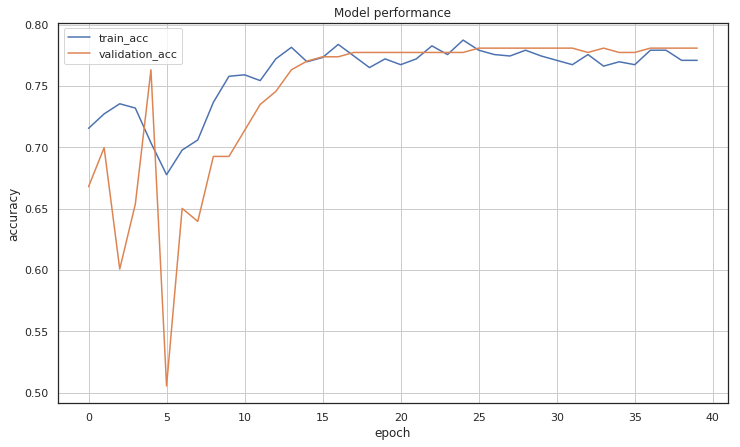

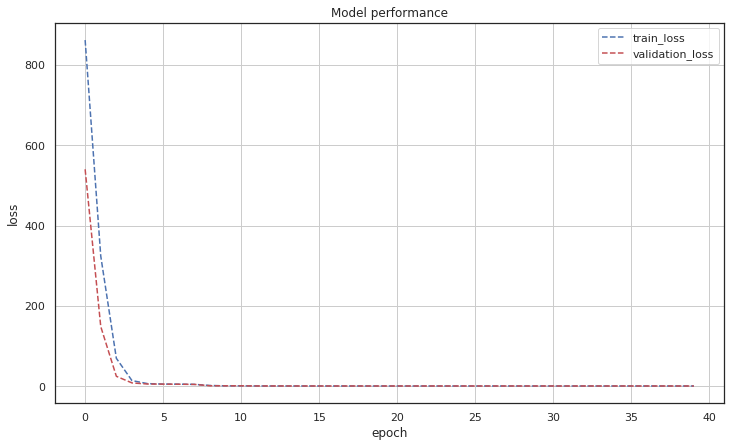

In [62]:
def history_plot(history):
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model performance')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_acc', 'validation_acc'], loc='upper left')
    plt.grid()
    plt.show()
    plt.plot(history.history['loss'], 'b--')
    plt.plot(history.history['val_loss'], 'r--')
    plt.title('Model performance')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='upper right')
    plt.grid()
    plt.show()

history_plot(history)

In [63]:
#Evaluate the model

score = model5.evaluate(images_test, y_test, batch_size=images_test.shape[0], verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

126/126 [==============================] - 0s 1ms/step
Test loss: 0.7488564848899841
Test accuracy: 0.8015872836112976


In [64]:
pred_class = model5.predict_classes(images_test,batch_size=images_test.shape[0],verbose=1)
y_pred = pred_class.reshape(images_test.shape[0],)
y_true = y_test

126/126 [==============================] - 1s 5ms/step


In [65]:
print ('number of Disease X-rays',sum(y_true))
print ('number of Disease X-rays predicted',sum(y_pred))
print ('Percentage of Disease X-rays',sum(y_true)/y_true.shape[0]*100)
print ('Percentage of Disease X-rays predicted',sum(y_pred)/y_pred.shape[0]*100)

number of Disease X-rays 65
number of Disease X-rays predicted 86
Percentage of Disease X-rays 51.587301587301596
Percentage of Disease X-rays predicted 68.25396825396825


In [66]:
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75        61
           1       0.73      0.97      0.83        65

    accuracy                           0.80       126
   macro avg       0.84      0.80      0.79       126
weighted avg       0.84      0.80      0.79       126



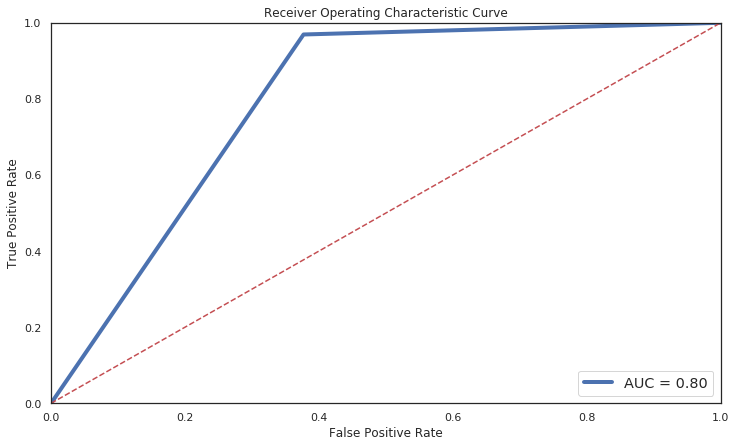

The sensitivity i.e true positives is 96.923077% 
The specificity i.e true negatives is 62.295082% 
The Type I error i.e. false negatives is 3.076923% 
The Type II error i.e. false positives is 37.704918% 


In [67]:

#Plotting the ROC-AUC curve   
fpr, tpr, threshold = metrics.roc_curve(y_true.ravel(), y_pred.ravel())
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', linewidth=4,label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right', fancybox=True, fontsize='large')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr=fpr[1]
tpr=tpr[1]
print ('The sensitivity i.e true positives is {0:2f}% '.format(tpr*100))
print ('The specificity i.e true negatives is {0:2f}% '.format((1-fpr)*100))
print ('The Type I error i.e. false negatives is {0:2f}% '.format((1-tpr)*100))
print ('The Type II error i.e. false positives is {0:2f}% '.format(fpr*100))


### The overfitting has also gone down and the accuracy also improved considerably over the previous iteration of the model from 65% to around 82%. 

This project is a small step towards medical image modelling by providing  successful (82% accuracy) binary X-ray image classification.  


## Conclusion:
### Neural networks need to be tuned to derive maximum benefit/accuracy. The quality of the data input can never be overstated i.e garbage in garbage out, which determines the success of any modelling technique.
### The medical imaging datasets are especially challenging to handle given great variation which becomes a problem since it is hard to decipher patterns in the data.

## 9. Future scope 
As a further improvement to the model we can attempt the multi label multi classification of CXRs using the preliminary research outline here:
#####                               Multilable Classfication with solving class imbalance by Undersampling/Oversampling and Class weights
#####                               and Softmax activation 
#####                               Probable model change with below:
######                        Solutions: 1) Object Detection with Bounding boxes.
######                                   2) Use of Structure Correcting Adversarial lNetwork (SCAN) framework (similar to conditional GAN)

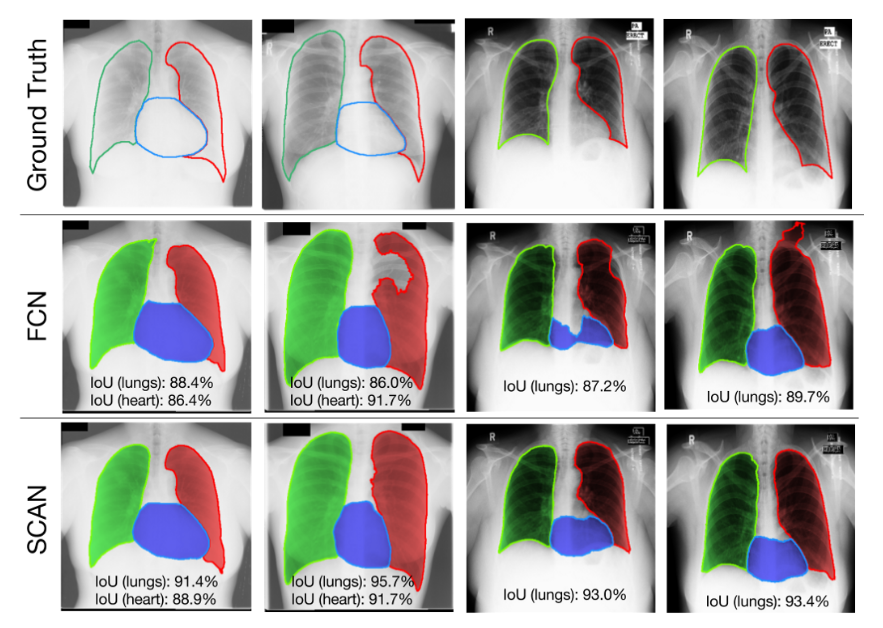

Source: Evaluation on JSRT dataset. (Candemir et. al., TMI (2014)) Research paper

Objective: Here in this dataset they are studying the heart lung disease Cardiomegaly where the enlarged heart creates bigger space between the lungs. which can be measured after the drawings of the lungs and the heart accurately. So segmentation of the organ boundaries or masks is necessary for this purpose.

Figure legend:
Top panel:
In the above Figure Ground Truth is the drawings by professional doctors with knowledge about the lung disease.

Middle panel:
FCN is from Fully Convolutional Network drawn iamges of lung and heart which as can be seen prone to make mistakes of not discerning the boundaries of lungs and heart.

Bottom panel:
SCAN on the other hand with its two networks Discriminator Network (D(x)) and Generator Network (G(z)) work together to train the generator network until the Discriminator network evalutes as acceptable. From the lower panel of the figure it can be observed that this netowrk does a great job in finding the lung boundaries and heart boundaries with accuracy similar to the ground truth or humans.